# Linear Regression Assignment - Bike Sharing

In [1]:
# import all the libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading the bike sharing csv fie
bike_sharing_df = pd.read_csv("/Users/parakh1.agarwal/Downloads/day.csv")

In [3]:
# Viewing first 10 rows 
bike_sharing_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Viewing last 10 rows
bike_sharing_df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Getting the dimension of the df
bike_sharing_df.shape

(730, 16)

In [6]:
# Getting info of the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**We can see that there are no empty or null values for all the columns**

In [7]:
# Describing the data
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Finding the no unique values of each column
bike_sharing_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

    Since our target variable count is the summation of casual and registerd variables which are also output variables , we can drop those variables
    We can also drop instant and dteday columns as well since the value of these columns are unique and hence serves no purpose for our analysis

In [9]:
# Dropping unused columns
bike_sharing_df_cleaned=bike_sharing_df.drop(columns=['casual','registered','instant','dteday'])

In [10]:
bike_sharing_df_cleaned.shape

(730, 12)

In [11]:
bike_sharing_df_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Let us get the unique value of seasom
bike_sharing_df_cleaned.season.unique()

array([1, 2, 3, 4])

We can convert the numerical value of categorical variable season to it's string representation. Let us name the following seasons as per the Data dictionary
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 1 -> Cloudy <br>
 2 -> Misty <br>
 3 -> Rainy <br>
 4 -> Snowy 

In [13]:
# Coverting the numerical value of categorical variable season to its string representation for creating dummy variables
bike_sharing_df_cleaned[['season']] = bike_sharing_df_cleaned[['season']].apply(lambda x : x.map({1:'spring',2:'summer', 3:'fall' ,4:'winter'}))

In [14]:
bike_sharing_df_cleaned.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
# Viewing distinct values of year column 
bike_sharing_df_cleaned.yr.unique()

array([0, 1])

In [16]:
# Checking the month column
bike_sharing_df_cleaned.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Since month is a categorical value and the month can affect the model hence we can create dummy variables for the month values. First we need to convert numeric values to string 

In [17]:
# Coverting numerical values of month into string values
bike_sharing_df_cleaned[['month']] = bike_sharing_df_cleaned[['mnth']].apply(lambda x : x.map({1:'Jan',2:'Feb', 3:'March' ,4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
bike_sharing_df_cleaned.drop(columns='mnth',axis=1)

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,spring,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan
2,spring,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,spring,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,spring,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,December
726,spring,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,December
727,spring,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,December
728,spring,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,December


In [18]:
bike_sharing_df_cleaned.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606,Jan
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510,Jan
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959,Jan
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822,Jan
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321,Jan


In [19]:
# checking the whethersit column
bike_sharing_df_cleaned.weathersit.unique()

array([2, 1, 3])

As per the Data Dictionary there can be 4 values of weathersit 1,2,3,4 and the mappings are as follows <br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

For the analysis we need to create the string represtantion of the variable and hence using the common part, have come up following mappings. <br>
1 -> Cloudy <br>
2 -> Misty  <br>
3 -> Rainy  <br>
4 -> Snow

In [20]:
# Coverting the numerical value of categorical variable weatherit to its string representation for creating dummy variables
bike_sharing_df_cleaned[['weathersit']] = bike_sharing_df_cleaned[['weathersit']].apply(lambda x : x.map({1:'Cloudy',2:'Misty', 3:'Rainy' ,4:'Snow'}))

In [21]:
bike_sharing_df_cleaned.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,Jan
2,spring,0,1,0,1,1,Cloudy,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,spring,0,1,0,2,1,Cloudy,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,spring,0,1,0,3,1,Cloudy,9.305237,11.46350,43.6957,12.522300,1600,Jan
5,spring,0,1,0,4,1,Cloudy,8.378268,11.66045,51.8261,6.000868,1606,Jan
6,spring,0,1,0,5,1,Misty,8.057402,10.44195,49.8696,11.304642,1510,Jan
7,spring,0,1,0,6,0,Misty,6.765000,8.11270,53.5833,17.875868,959,Jan
8,spring,0,1,0,0,0,Cloudy,5.671653,5.80875,43.4167,24.250650,822,Jan
9,spring,0,1,0,1,1,Cloudy,6.184153,7.54440,48.2917,14.958889,1321,Jan


Converting the numerical value of categorical variable weekday to its string representation for creating dummy variables.


In [22]:
bike_sharing_df_cleaned[['weekday']] = bike_sharing_df_cleaned[['weekday']].apply(lambda x : x.map({0:'Sunday',1:'Monday',2:'Tuesday', 3:'Wednesday' ,4:'Thursday',5:'Friday' ,6 : 'Saturday'}))

In [23]:
bike_sharing_df_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,spring,0,1,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985,Jan
1,spring,0,1,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801,Jan
2,spring,0,1,0,Monday,1,Cloudy,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,spring,0,1,0,Tuesday,1,Cloudy,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,spring,0,1,0,Wednesday,1,Cloudy,9.305237,11.46350,43.6957,12.522300,1600,Jan


# Performing EDA on the Data

<Axes: xlabel='windspeed', ylabel='cnt'>

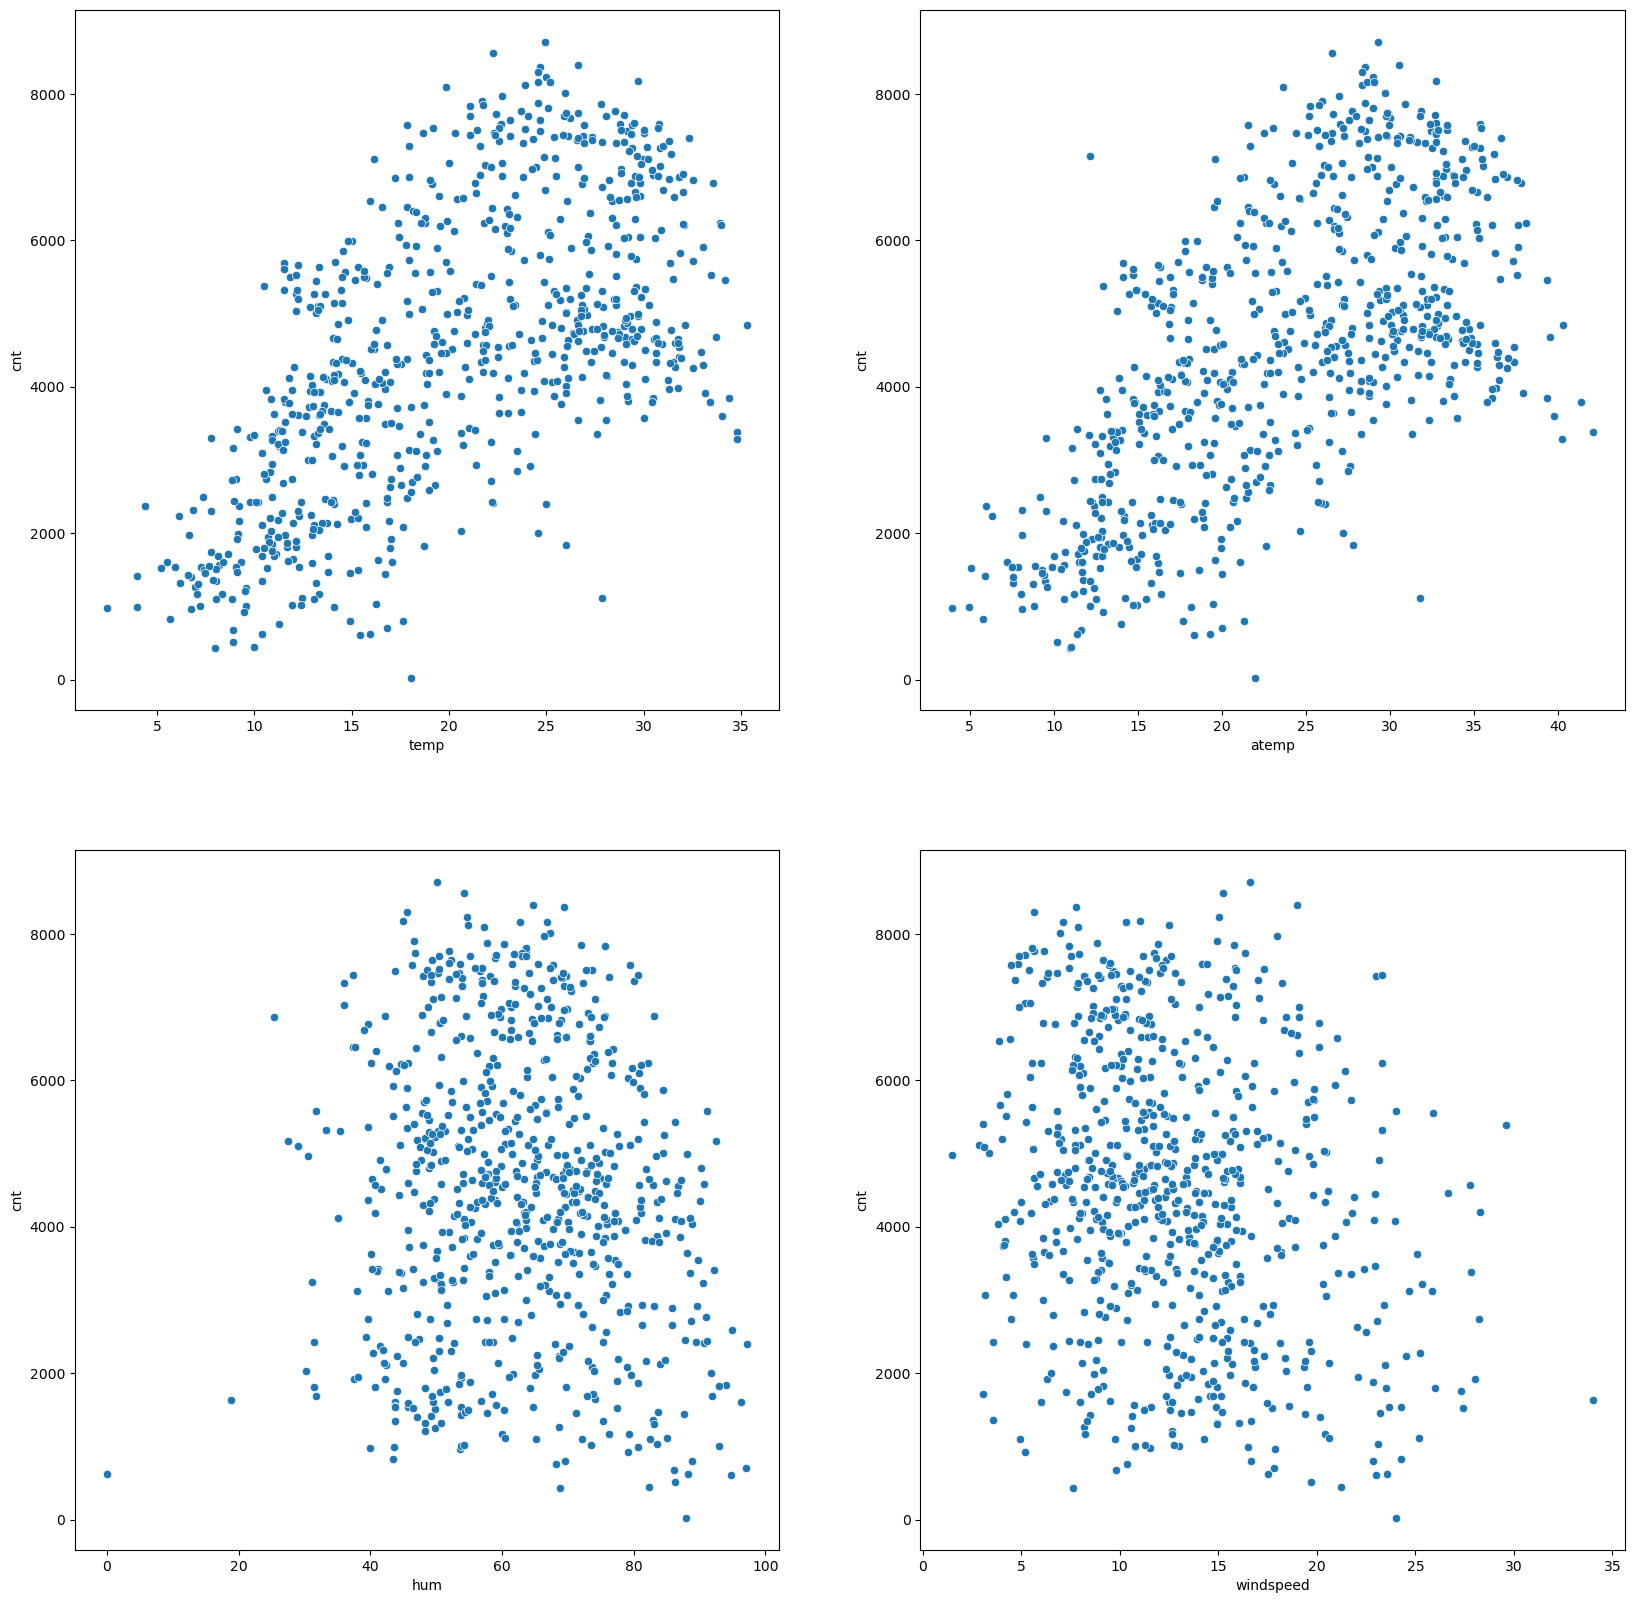

In [170]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.scatterplot(x='temp',y='cnt',data=bike_sharing_df_cleaned)
plt.subplot(2,2,2)
sns.scatterplot(x='atemp',y='cnt',data=bike_sharing_df_cleaned)
plt.subplot(2,2,3)
sns.scatterplot(x='hum',y='cnt',data=bike_sharing_df_cleaned)
plt.subplot(2,2,4)
sns.scatterplot(x='windspeed',y='cnt',data=bike_sharing_df_cleaned)


**Observations** : <br>
    1) temp and atemp seems to have a linear relationship and positive with cnt with similar values and pattern , hence only 1 variable can be used a predictor variable. <br>
    2) hum and windspeed doesn't have any clear relationship with cnt ,hence further analysis needs to be done on this.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

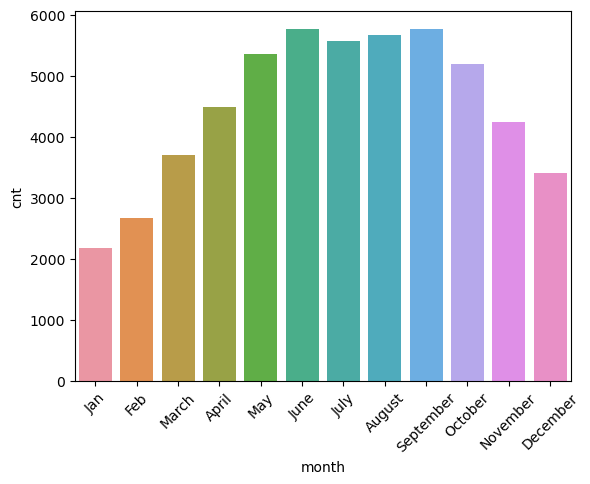

In [30]:
# Plotting the barplot which the avg count month wise
bike_sharing_df_cleaned_monthly = bike_sharing_df_cleaned.groupby(by='month').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_monthly.head()
plot=sns.barplot(x='month',y='cnt',data=bike_sharing_df_cleaned_monthly,order=['Jan','Feb','March','April','May','June','July','August','September','October','November','December'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

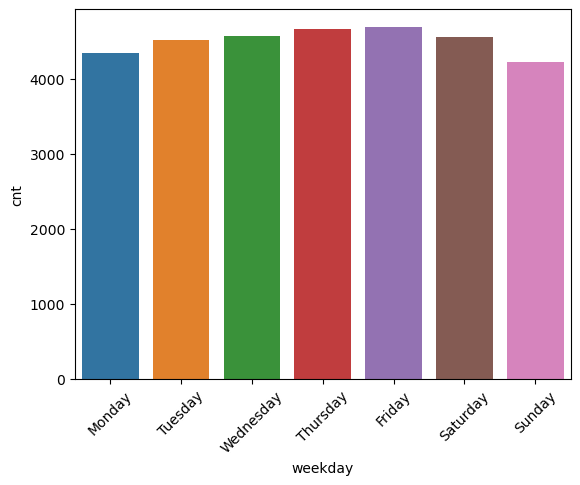

In [27]:
# Avg count per day of the week
bike_sharing_df_cleaned_weekday = bike_sharing_df_cleaned.groupby(by='weekday').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_weekday.head()
plot=sns.barplot(x='weekday',y='cnt',data=bike_sharing_df_cleaned_weekday,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

[Text(0, 0, 'fall'),
 Text(1, 0, 'spring'),
 Text(2, 0, 'summer'),
 Text(3, 0, 'winter')]

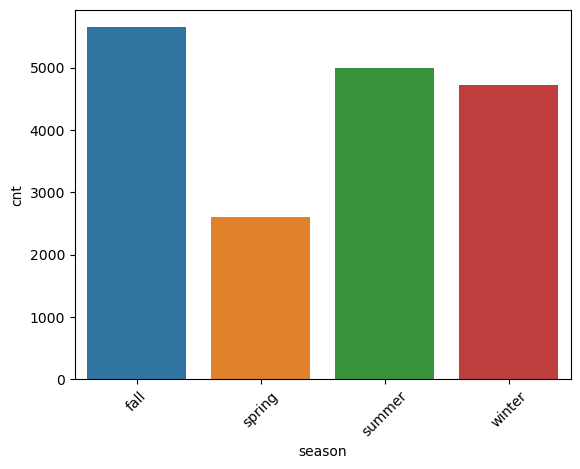

In [28]:
# Avg count per season
bike_sharing_df_cleaned_season = bike_sharing_df_cleaned.groupby(by='season').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_season.head()
plot=sns.barplot(x='season',y='cnt',data=bike_sharing_df_cleaned_season)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

[Text(0, 0, '0'), Text(1, 0, '1')]

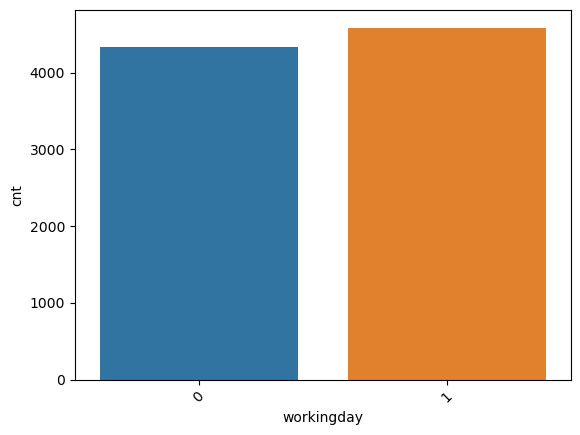

In [31]:
# Avg count on working vs non working day
bike_sharing_df_cleaned_wd = bike_sharing_df_cleaned.groupby(by='workingday').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_wd.head()
plot=sns.barplot(x='workingday',y='cnt',data=bike_sharing_df_cleaned_wd)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

[Text(0, 0, '0'), Text(1, 0, '1')]

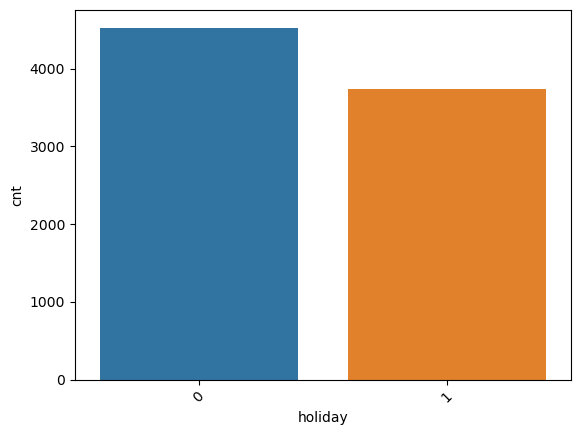

In [32]:
# Avg count on holiday vs non-holiday
bike_sharing_df_cleaned_hd = bike_sharing_df_cleaned.groupby(by='holiday').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_hd.head()
plot=sns.barplot(x='holiday',y='cnt',data=bike_sharing_df_cleaned_hd)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

[Text(0, 0, 'Cloudy'), Text(1, 0, 'Misty'), Text(2, 0, 'Rainy')]

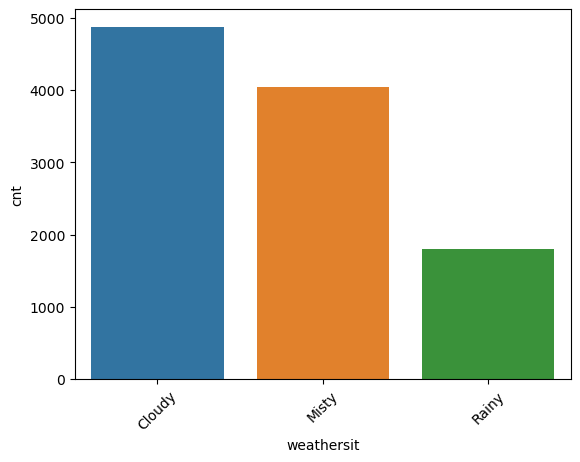

In [29]:
# Weather wise avg count
bike_sharing_df_cleaned_weather = bike_sharing_df_cleaned.groupby(by='weathersit').mean()[['cnt']].reset_index()
bike_sharing_df_cleaned_weather.head()
plot=sns.barplot(x='weathersit',y='cnt',data=bike_sharing_df_cleaned_weather)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

**Observations**: <br>
1) June to September has the highest count comprising of both years while January has the lowerest count. <br>
2) All the days of the week had almost the same avg cnt. <br>
3) Rental cnt decreases in spring season. <br>
4) Rental cnt decreases in rainy weather. <br>
5) Count is more on a non-holiday. <br>
6) Count is more on working day but not much greater than non-working. <br> 

<Axes: >

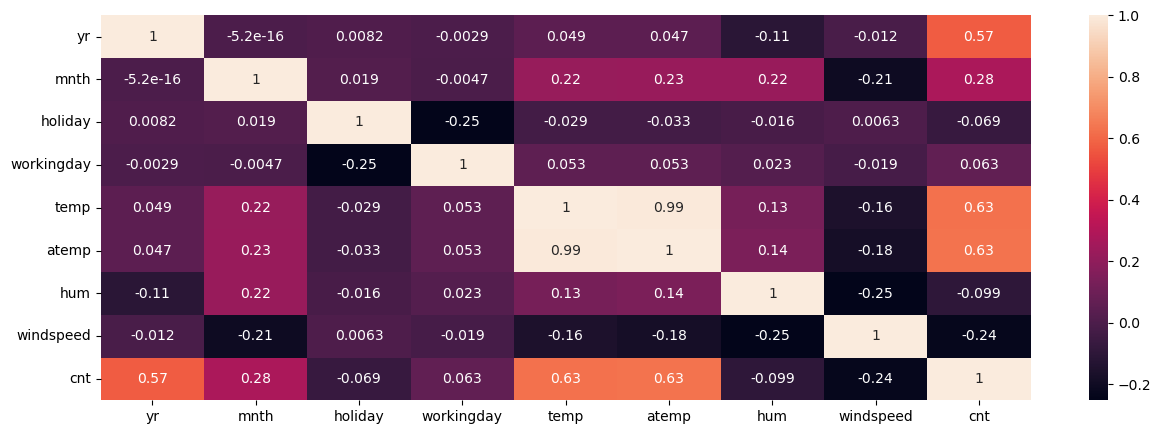

In [33]:
# Genqarting the heatmap to find correlation of numerical variables with each other

plt.figure(figsize=(15,5))
sns.heatmap(bike_sharing_df_cleaned.corr(),annot=True)

**Observations**: <br>
    1) cnt is positively correlated with year hence it means sales can increase on yearly basis. <br>
    2) cnt is negatively correlated with holoday which seems a bit surprising , this may be due to festivals where people prefer to stay at home. <br>
    3)cnt has neagtive correlation with windspeed , hence wind might be a factor in creating the model. <br>
    4) temp and atemp have almost a correlation of 1 with each other and both have the same correlation with count and hence out of these 2 only ony 1 variable can be used.
    
    

Text(0, 0.5, 'Count')

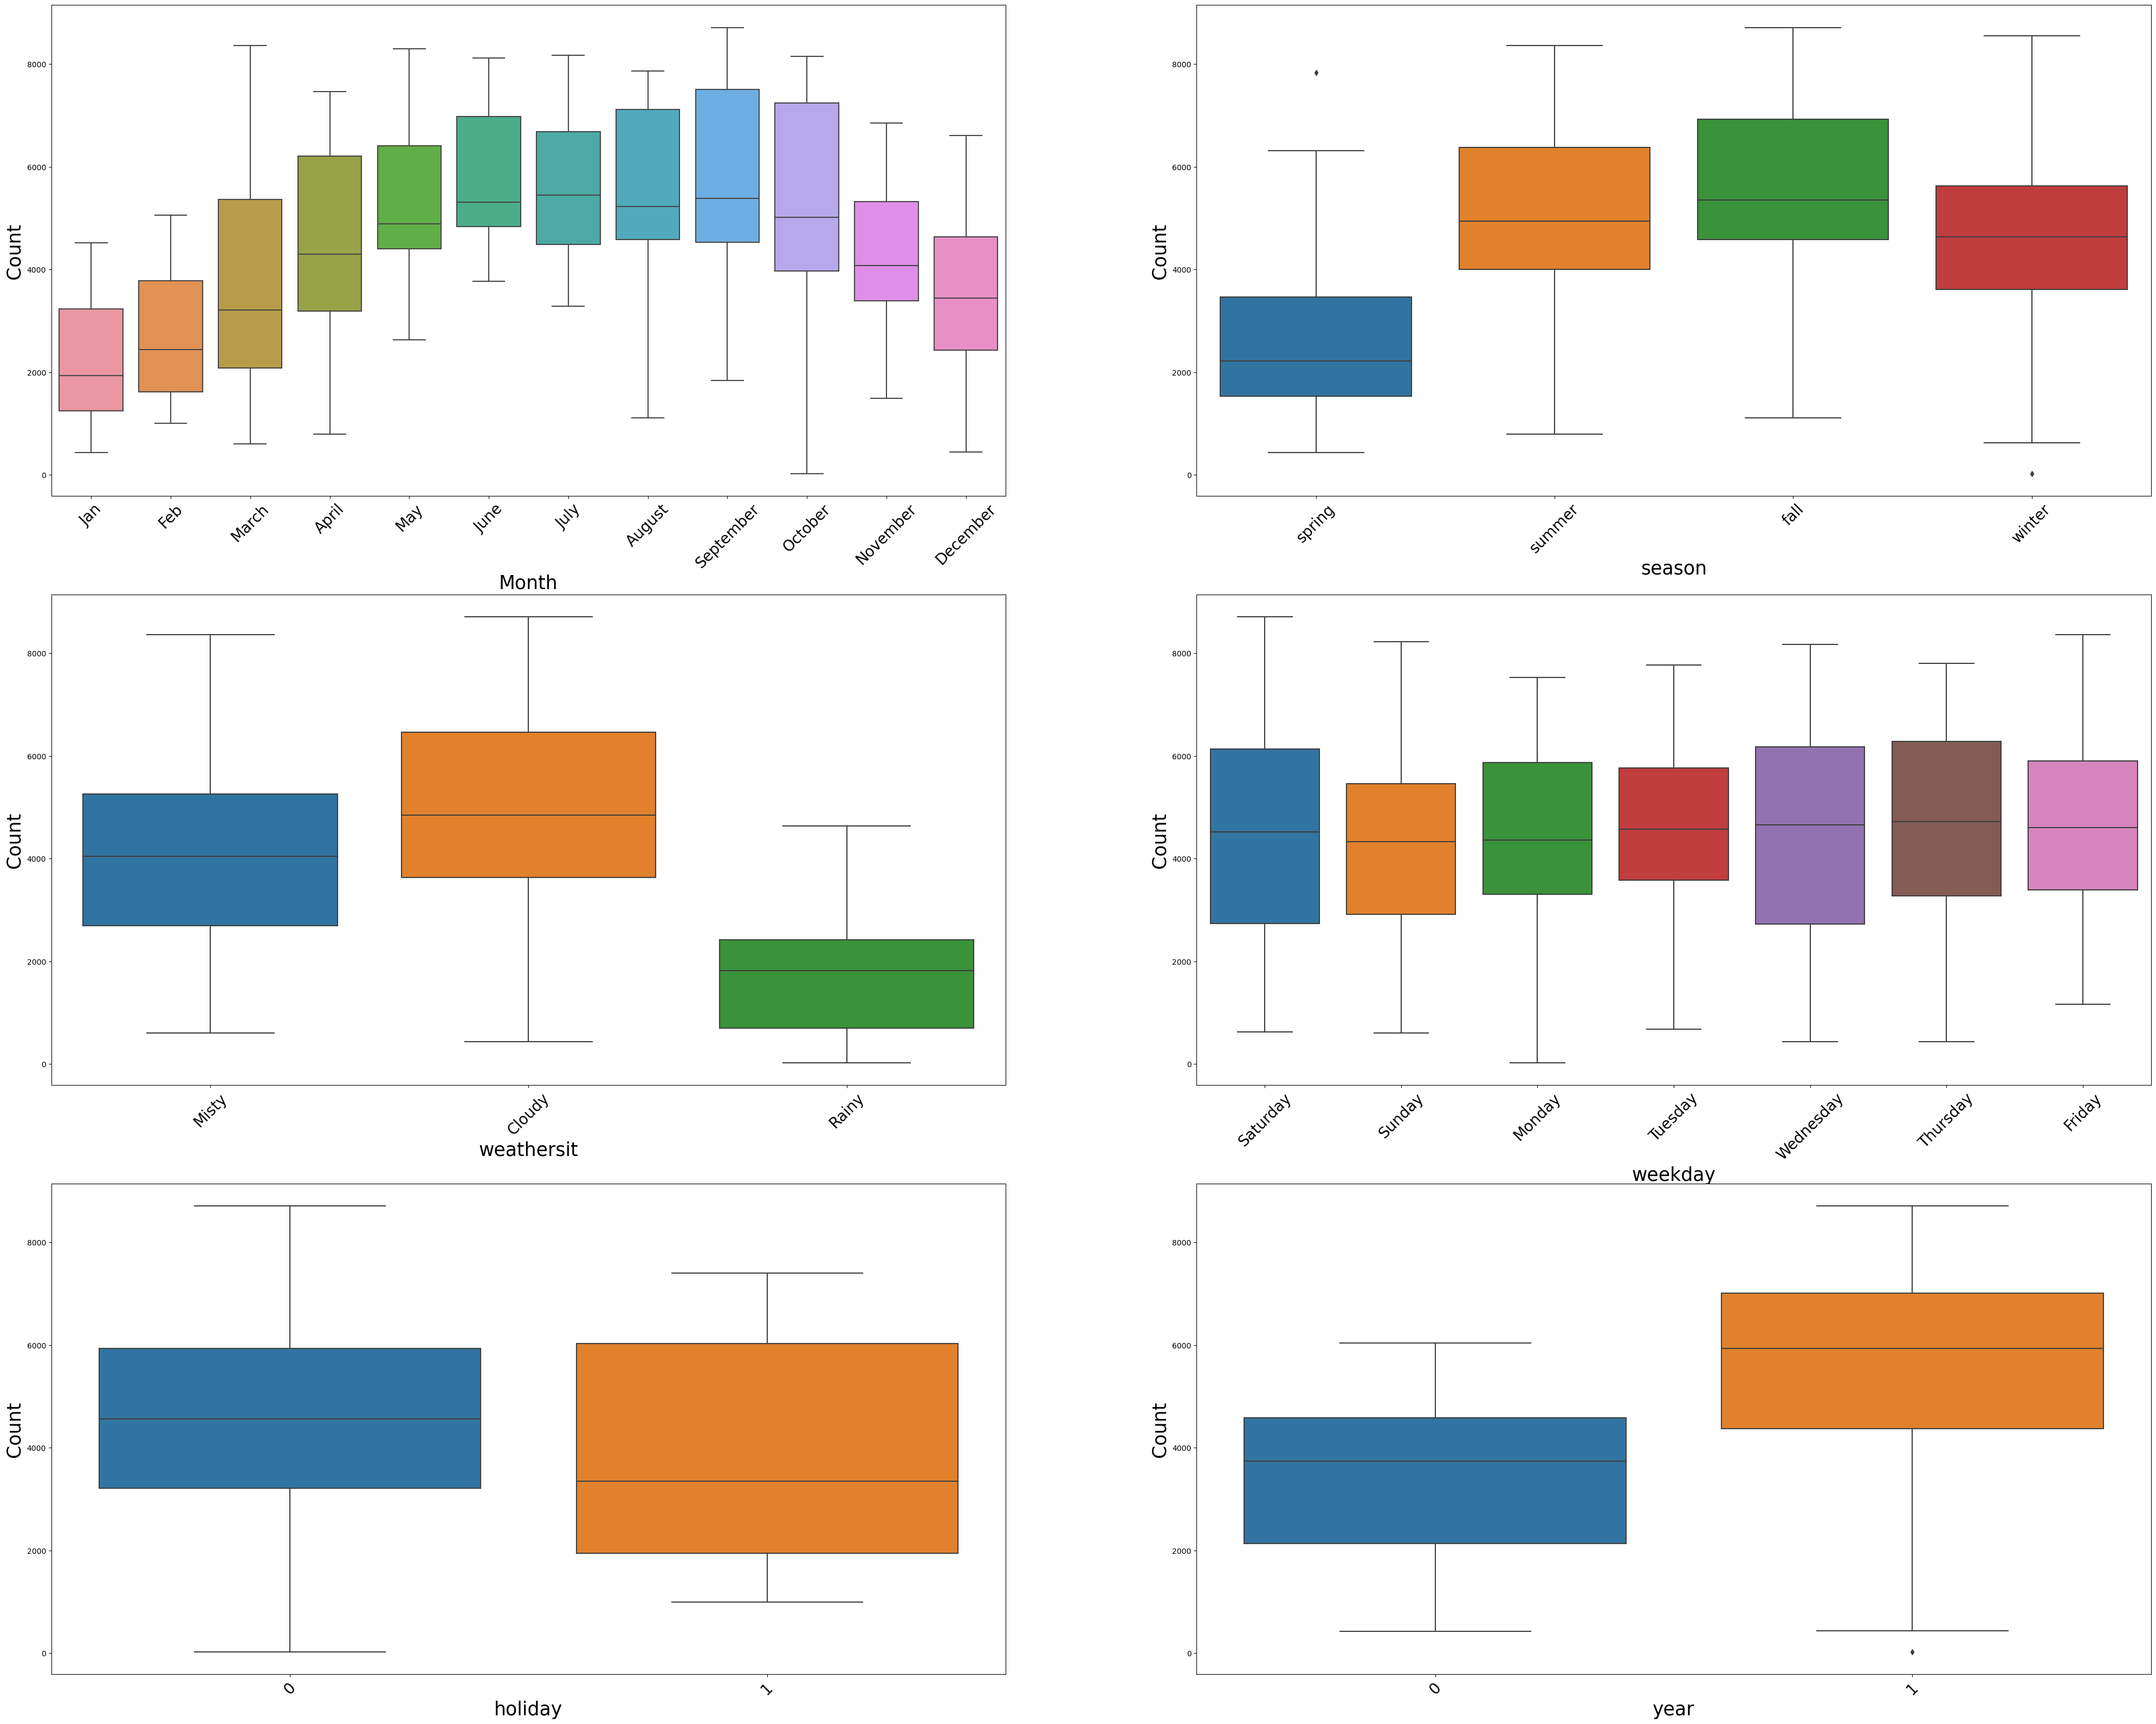

In [111]:
# Generating the boxplot 
plt.figure(figsize=(50, 40))
plt.subplot(3,2,1)
plot=sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('Month', fontsize=25)
plot.set_ylabel('Count', fontsize=25)


plot=plt.subplot(3,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('season', fontsize=25)
plot.set_ylabel('Count', fontsize=25)

plot=plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('weathersit', fontsize=25)
plot.set_ylabel('Count', fontsize=25)

plot=plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('weekday', fontsize=25)
plot.set_ylabel('Count', fontsize=25)

plot=plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('holiday', fontsize=25)
plot.set_ylabel('Count', fontsize=25)

plot=plt.subplot(3,2,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df_cleaned)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,fontsize=20)
plot.set_xlabel('year', fontsize=25)
plot.set_ylabel('Count', fontsize=25)

**Observations** : <br> 
1) Count is highest in july ,auguust ,september which falls on the fall season which is eveident from the season boxplot which has the highest median and these month falls in the fall season <br>
2) Count is also high in the months of April , may and june which falls in the summer season <br>
3) Count is highest in the cloudy weather and rainy season has the lowest count which is evident that rain decreases the sales of rental bikes.
4) There is no major difference in the counts accross the week.
5) The count increased rapidly in 2019  

Now let us create the dummy variables for the categorical variables


In [35]:
# Month Dummy
month_dummy_df=pd.get_dummies(bike_sharing_df_cleaned.month, drop_first=True)
month_dummy_df.head(10)

,August,December,Feb,Jan,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# Season dummy 
season_dummy_df=pd.get_dummies(bike_sharing_df_cleaned.season, drop_first=True)
season_dummy_df.head(10)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [37]:
# Weather sit dummy
weather_dummy_df=pd.get_dummies(bike_sharing_df_cleaned.weathersit)
weather_dummy_df.head(10)

,Cloudy,Misty,Rainy
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,0,1,0
8,1,0,0
9,1,0,0


   **Please note** I haven't dropped the first variable since the dataset has only 3 values and hence if we drop the first variable we  will be left with only 2 variables and that won't be good for prediction

In [38]:
# Weekday dummy
weekday_dummy_df=pd.get_dummies(bike_sharing_df_cleaned.weekday,drop_first=True)
weekday_dummy_df.head(10)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0
6,0,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,1,0,0,0,0,0


In [39]:
# Concat all dummy df with main df
bike_sharing_dummy_df=pd.concat([bike_sharing_df_cleaned,weekday_dummy_df,weather_dummy_df,season_dummy_df,month_dummy_df],axis=1)
bike_sharing_dummy_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,December,Feb,Jan,July,June,March,May,November,October,September
0,spring,0,1,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Cloudy,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Cloudy,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Cloudy,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0
5,spring,0,1,0,Thursday,1,Cloudy,8.378268,11.66045,51.8261,...,0,0,1,0,0,0,0,0,0,0
6,spring,0,1,0,Friday,1,Misty,8.057402,10.44195,49.8696,...,0,0,1,0,0,0,0,0,0,0
7,spring,0,1,0,Saturday,0,Misty,6.765000,8.11270,53.5833,...,0,0,1,0,0,0,0,0,0,0
8,spring,0,1,0,Sunday,0,Cloudy,5.671653,5.80875,43.4167,...,0,0,1,0,0,0,0,0,0,0
9,spring,0,1,0,Monday,1,Cloudy,6.184153,7.54440,48.2917,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Printing all the columns
bike_sharing_dummy_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'month',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Cloudy', 'Misty', 'Rainy', 'spring', 'summer', 'winter', 'August',
       'December', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [41]:
# Dropping the existing categorical columns
bike_sharing_dummy_df=bike_sharing_dummy_df.drop(['season','mnth','weekday','weathersit','month'],axis=1)

In [42]:
bike_sharing_dummy_df.columns
bike_sharing_dummy_df.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,Feb,Jan,July,June,March,May,November,October,September
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,1,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into train and test

In [43]:
# Split the dataframe into train and test
df_train, df_test = train_test_split( bike_sharing_dummy_df , train_size=0.70 , test_size = 0.30 , random_state=100)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,Feb,Jan,July,June,March,May,November,October,September
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


## Scaling the data

In [45]:
# We are using MinMaxScaler with feature range 0 to 1
scaler = MinMaxScaler(feature_range=(0,1)) 

In [46]:
# Variables to be scaled
scaler_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[scaler_vars] =scaler.fit_transform(df_train[scaler_vars])

In [47]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,Feb,Jan,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Monday,Saturday,...,December,Feb,Jan,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.150980,0.154902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.358381,0.362166,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
#df_test[scaler_vars]=scaler.transform(df_test[scaler_vars])

# Training the model 
Since we had seen the correlation between the cnt and temp and atemp was maximum i.e 0.63 . Let us train the model first using these 2 variables

In [49]:
# Let us initialise X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train


In [50]:
#Now let us add constant variable i.e.intercept
X_train_sm=sm.add_constant(X_train[['temp','atemp']])

In [51]:
# Initialise the regression function object
lr= sm.OLS(y_train,X_train_sm)

In [52]:
# Fit the model
lr_model=lr.fit()

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.95e-60
Time:                        20:57:53   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating the VIF

In [54]:
# Import the statsmodelsmodule for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif = pd.DataFrame()

In [56]:
vif['Features'] = X_train_sm.columns

In [57]:
#Calculating the VIF
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [58]:
vif

,Features,VIF
0,const,6.851496
1,temp,48.039003
2,atemp,48.039003


Here we can see that the variables temp and atemp have a very high VIF and are exactly the same but atemp had a lower p value , hence we can drop the temp variable from the model.

In [59]:
#After dropping the temp variable
X_train_sm=sm.add_constant(X_train[['atemp']])

In [60]:
# Training and fitting the model
lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.10e-61
Time:                        20:58:04   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see after dropping the variable R-squared has been decreased by a little bit but Adj.R-squared has increase hence variable temp was redundant

### Now let us build a model using all the columns of the dataset using rfe and check the statistics

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Now let us run rfe with the output no of variables as 20
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=lm,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Cloudy', True, 1),
 ('Misty', True, 1),
 ('Rainy', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 9),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 8),
 ('September', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
col=col.drop('temp')

In [65]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Thursday', 'Tuesday', 'Wednesday', 'summer', 'August',
       'June', 'March', 'May', 'October'],
      dtype='object')

### Building models using statsmodel api for all the columns generated using rfe

In [66]:
X_train_ref=X_train[col]

In [67]:
X_train_ref_sm=sm.add_constant(X_train_ref)


In [68]:
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.65e-188
Time:                        20:58:13   Log-Likelihood:                 518.47
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1528      0.023      6.623      0.000       0.107       0.198
yr             0.2329      0.008     29.002      0.000       0.217       0.249
holiday       -0.0205      0.021     -0.970      0.332      -0.062       0.021
workingday     0.0694      0.009      7.747      0.000       0.052       0.087
atemp          0.4268      0.035     12.142      0.000       0.358       0.496
hum           -0.1368      0.038     -3.640      0.000      -0.211      -0.063
windspeed     -0.1695      0.026     -6.611      0.000      -0.220      -0.119
Saturday       0.0791      0.011      7.159      0.000       0.057       0.101
Sunday         0.0247      0.012      2.108      0.036       0.002       0.048
Cloudy         0.1579      0.009     16.794      0.000       0.139       0.176
Misty          0.0962      0.011      8.628      0.000       0.074       0.118
Rainy         -0.1014      0.021     -4.844      0.000      -0.142      -0.060
spring        -0.0910      0.017     -5.353      0.000      -0.124      -0.058
winter         0.0694      0.014      5.008      0.000       0.042       0.097
December      -0.0606      0.018     -3.399      0.001      -0.096      -0.026
Feb           -0.0418      0.021     -1.953      0.051      -0.084       0.000
Jan           -0.0748      0.021     -3.551      0.000      -0.116      -0.033
July          -0.0622      0.017     -3.651      0.000      -0.096      -0.029
November      -0.0564      0.019     -3.046      0.002      -0.093      -0.020
September      0.0570      0.015      3.714      0.000       0.027       0.087
==============================================================================
Omnibus:                       81.959   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.047
Skew:                          -0.762   Prob(JB):                     4.54e-53
Kurtosis:                       6.003   Cond. No.                     1.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Build a VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Misty,inf
6,Saturday,inf
10,Rainy,inf
1,holiday,inf
7,Sunday,inf
8,Cloudy,inf
2,workingday,inf
3,atemp,3.57
11,spring,3.41
12,winter,2.30


###  Here we can see that there are 6 variables which have infite VIF out of those *holiday*  has the highest p-value of 0.336 and  hence can be dropped.

In [70]:
X_train_ref=X_train_ref.drop('holiday',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)


In [71]:
# Training the model
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.65e-188
Time:                        20:58:19   Log-Likelihood:                 518.47
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1374      0.033      4.134      0.000       0.072       0.203
yr             0.2329      0.008     29.002      0.000       0.217       0.249
workingday     0.0899      0.026      3.507      0.000       0.040       0.140
atemp          0.4268      0.035     12.142      0.000       0.358       0.496
hum           -0.1368      0.038     -3.640      0.000      -0.211      -0.063
windspeed     -0.1695      0.026     -6.611      0.000      -0.220      -0.119
Saturday       0.0996      0.027      3.672      0.000       0.046       0.153
Sunday         0.0451      0.027      1.658      0.098      -0.008       0.099
Cloudy         0.1528      0.012     13.250      0.000       0.130       0.175
Misty          0.0911      0.014      6.711      0.000       0.064       0.118
Rainy         -0.1065      0.023     -4.650      0.000      -0.151      -0.061
spring        -0.0910      0.017     -5.353      0.000      -0.124      -0.058
winter         0.0694      0.014      5.008      0.000       0.042       0.097
December      -0.0606      0.018     -3.399      0.001      -0.096      -0.026
Feb           -0.0418      0.021     -1.953      0.051      -0.084       0.000
Jan           -0.0748      0.021     -3.551      0.000      -0.116      -0.033
July          -0.0622      0.017     -3.651      0.000      -0.096      -0.029
November      -0.0564      0.019     -3.046      0.002      -0.093      -0.020
September      0.0570      0.015      3.714      0.000       0.027       0.087
==============================================================================
Omnibus:                       81.959   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.047
Skew:                          -0.762   Prob(JB):                     4.54e-53
Kurtosis:                       6.003   Cond. No.                     1.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
# Build a VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Cloudy,67.51
8,Misty,43.09
1,workingday,9.23
5,Saturday,6.18
6,Sunday,5.83
9,Rainy,5.16
2,atemp,3.57
10,spring,3.41
11,winter,2.30
14,Jan,2.29


    Here we can see that Cloudy  highest VIF but Sunday has the highest p value is insugnificanyt and hwncw we can drop sunday

In [73]:
# Dropping Sunday variable and training the model
X_train_ref=X_train_ref.drop('Sunday',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.86e-189
Time:                        20:58:21   Log-Likelihood:                 517.05
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.028      5.946      0.000       0.112       0.222
yr             0.2330      0.008     28.976      0.000       0.217       0.249
workingday     0.0514      0.011      4.724      0.000       0.030       0.073
atemp          0.4253      0.035     12.081      0.000       0.356       0.494
hum           -0.1357      0.038     -3.605      0.000      -0.210      -0.062
windspeed     -0.1700      0.026     -6.619      0.000      -0.220      -0.120
Saturday       0.0611      0.014      4.346      0.000       0.033       0.089
Cloudy         0.1625      0.010     16.328      0.000       0.143       0.182
Misty          0.1010      0.012      8.268      0.000       0.077       0.125
Rainy         -0.0965      0.022     -4.359      0.000      -0.140      -0.053
spring        -0.0915      0.017     -5.373      0.000      -0.125      -0.058
winter         0.0697      0.014      5.024      0.000       0.042       0.097
December      -0.0617      0.018     -3.459      0.001      -0.097      -0.027
Feb           -0.0434      0.021     -2.025      0.043      -0.086      -0.001
Jan           -0.0763      0.021     -3.620      0.000      -0.118      -0.035
July          -0.0612      0.017     -3.591      0.000      -0.095      -0.028
November      -0.0601      0.018     -3.265      0.001      -0.096      -0.024
September      0.0551      0.015      3.591      0.000       0.025       0.085
==============================================================================
Omnibus:                       87.839   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.244
Skew:                          -0.805   Prob(JB):                     5.64e-59
Kurtosis:                       6.168   Cond. No.                     1.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# Build a VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Cloudy,44.87
7,Misty,30.60
8,Rainy,4.08
2,atemp,3.57
9,spring,3.41
10,winter,2.30
13,Jan,2.29
3,hum,1.92
12,Feb,1.83
15,November,1.71


    We can see Cloudy  has the highest VIF nad can be dropped


In [75]:
# Dropping Sunday variable and training the model
X_train_ref=X_train_ref.drop('Cloudy',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.86e-189
Time:                        20:58:23   Log-Likelihood:                 517.05
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3295      0.033      9.855      0.000       0.264       0.395
yr             0.2330      0.008     28.976      0.000       0.217       0.249
workingday     0.0514      0.011      4.724      0.000       0.030       0.073
atemp          0.4253      0.035     12.081      0.000       0.356       0.494
hum           -0.1357      0.038     -3.605      0.000      -0.210      -0.062
windspeed     -0.1700      0.026     -6.619      0.000      -0.220      -0.120
Saturday       0.0611      0.014      4.346      0.000       0.033       0.089
Misty         -0.0615      0.010     -5.881      0.000      -0.082      -0.041
Rainy         -0.2590      0.026     -9.820      0.000      -0.311      -0.207
spring        -0.0915      0.017     -5.373      0.000      -0.125      -0.058
winter         0.0697      0.014      5.024      0.000       0.042       0.097
December      -0.0617      0.018     -3.459      0.001      -0.097      -0.027
Feb           -0.0434      0.021     -2.025      0.043      -0.086      -0.001
Jan           -0.0763      0.021     -3.620      0.000      -0.118      -0.035
July          -0.0612      0.017     -3.591      0.000      -0.095      -0.028
November      -0.0601      0.018     -3.265      0.001      -0.096      -0.024
September      0.0551      0.015      3.591      0.000       0.025       0.085
==============================================================================
Omnibus:                       87.839   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.244
Skew:                          -0.805   Prob(JB):                     5.64e-59
Kurtosis:                       6.168   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Generating VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.13
2,atemp,18.19
1,workingday,4.67
4,windspeed,4.12
8,spring,4.11
9,winter,2.95
12,Jan,2.38
6,Misty,2.27
0,yr,2.07
11,Feb,1.91


In [77]:
# Dropping hum variable and training the model
X_train_ref=X_train_ref.drop('hum',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.12e-187
Time:                        20:58:25   Log-Likelihood:                 510.41
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     494   BIC:                            -921.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.027      9.466      0.000       0.205       0.312
yr             0.2363      0.008     29.218      0.000       0.220       0.252
workingday     0.0539      0.011      4.902      0.000       0.032       0.075
atemp          0.3930      0.034     11.406      0.000       0.325       0.461
windspeed     -0.1470      0.025     -5.838      0.000      -0.196      -0.098
Saturday       0.0652      0.014      4.600      0.000       0.037       0.093
Misty         -0.0834      0.009     -9.652      0.000      -0.100      -0.066
Rainy         -0.2973      0.024    -12.169      0.000      -0.345      -0.249
spring        -0.0933      0.017     -5.415      0.000      -0.127      -0.059
winter         0.0621      0.014      4.476      0.000       0.035       0.089
December      -0.0673      0.018     -3.741      0.000      -0.103      -0.032
Feb           -0.0448      0.022     -2.064      0.040      -0.087      -0.002
Jan           -0.0819      0.021     -3.848      0.000      -0.124      -0.040
July          -0.0541      0.017     -3.155      0.002      -0.088      -0.020
November      -0.0597      0.019     -3.206      0.001      -0.096      -0.023
September      0.0521      0.016      3.363      0.001       0.022       0.083
==============================================================================
Omnibus:                       91.295   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.213
Skew:                          -0.837   Prob(JB):                     3.86e-61
Kurtosis:                       6.208   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.67
1,workingday,4.57
3,windspeed,4.10
7,spring,3.82
8,winter,2.60
11,Jan,2.22
0,yr,2.07
10,Feb,1.88
4,Saturday,1.82
13,November,1.79


 **Note** : We can see here that the atemp has the highest VIF but in the EDA we saw that hum has the highest correlation so removing Feb variable which has p-value of 0.40

In [79]:
# Dropping Feb variable and training the model

X_train_ref=X_train_ref.drop('Feb',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.25e-187
Time:                        20:58:27   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2467      0.027      9.209      0.000       0.194       0.299
yr             0.2360      0.008     29.092      0.000       0.220       0.252
workingday     0.0545      0.011      4.947      0.000       0.033       0.076
atemp          0.4088      0.034     12.128      0.000       0.343       0.475
windspeed     -0.1441      0.025     -5.712      0.000      -0.194      -0.095
Saturday       0.0667      0.014      4.695      0.000       0.039       0.095
Misty         -0.0834      0.009     -9.624      0.000      -0.100      -0.066
Rainy         -0.2964      0.025    -12.094      0.000      -0.345      -0.248
spring        -0.1097      0.015     -7.165      0.000      -0.140      -0.080
winter         0.0611      0.014      4.389      0.000       0.034       0.088
December      -0.0568      0.017     -3.281      0.001      -0.091      -0.023
Jan           -0.0587      0.018     -3.237      0.001      -0.094      -0.023
July          -0.0568      0.017     -3.311      0.001      -0.090      -0.023
November      -0.0548      0.019     -2.954      0.003      -0.091      -0.018
September      0.0521      0.016      3.348      0.001       0.022       0.083
==============================================================================
Omnibus:                       85.682   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.500
Skew:                          -0.787   Prob(JB):                     4.47e-57
Kurtosis:                       6.120   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Generating VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.60
1,workingday,4.57
3,windspeed,4.09
8,winter,2.57
7,spring,2.43
0,yr,2.06
4,Saturday,1.82
12,November,1.77
10,Jan,1.67
5,Misty,1.56


In [81]:
# Dropping Feb variable and training the model
X_train_ref=X_train_ref.drop('atemp',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.61e-161
Time:                        20:58:28   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5177      0.017     30.809      0.000       0.485       0.551
yr             0.2463      0.009     26.834      0.000       0.228       0.264
workingday     0.0570      0.013      4.545      0.000       0.032       0.082
windspeed     -0.2055      0.028     -7.310      0.000      -0.261      -0.150
Saturday       0.0668      0.016      4.132      0.000       0.035       0.099
Misty         -0.0915      0.010     -9.309      0.000      -0.111      -0.072
Rainy         -0.3173      0.028    -11.408      0.000      -0.372      -0.263
spring        -0.2159      0.014    -15.097      0.000      -0.244      -0.188
winter         0.0110      0.015      0.724      0.469      -0.019       0.041
December      -0.1109      0.019     -5.826      0.000      -0.148      -0.073
Jan           -0.1226      0.020     -6.217      0.000      -0.161      -0.084
July           0.0158      0.018      0.867      0.387      -0.020       0.052
November      -0.1012      0.021     -4.904      0.000      -0.142      -0.061
September      0.0750      0.018      4.272      0.000       0.041       0.110
==============================================================================
Omnibus:                       69.435   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.194
Skew:                          -0.714   Prob(JB):                     1.34e-36
Kurtosis:                       5.395   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.51
1,workingday,3.19
7,winter,2.56
6,spring,2.31
0,yr,1.88
11,November,1.76
9,Jan,1.64
3,Saturday,1.55
4,Misty,1.54
8,December,1.46


    Removing July from the variables as July had the high p-value 0.387

In [83]:
# Dropping July variable and training the model

X_train_ref=X_train_ref.drop('July',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          7.43e-162
Time:                        20:58:39   Log-Likelihood:                 441.50
No. Observations:                 510   AIC:                            -857.0
Df Residuals:                     497   BIC:                            -801.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5215      0.016     32.157      0.000       0.490       0.553
yr             0.2464      0.009     26.843      0.000       0.228       0.264
workingday     0.0567      0.013      4.525      0.000       0.032       0.081
windspeed     -0.2076      0.028     -7.415      0.000      -0.263      -0.153
Saturday       0.0667      0.016      4.129      0.000       0.035       0.098
Misty         -0.0924      0.010     -9.451      0.000      -0.112      -0.073
Rainy         -0.3170      0.028    -11.401      0.000      -0.372      -0.262
spring        -0.2183      0.014    -15.577      0.000      -0.246      -0.191
winter         0.0086      0.015      0.578      0.564      -0.021       0.038
December      -0.1112      0.019     -5.844      0.000      -0.149      -0.074
Jan           -0.1227      0.020     -6.223      0.000      -0.161      -0.084
November      -0.1015      0.021     -4.921      0.000      -0.142      -0.061
September      0.0728      0.017      4.192      0.000       0.039       0.107
==============================================================================
Omnibus:                       69.784   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.202
Skew:                          -0.717   Prob(JB):                     8.12e-37
Kurtosis:                       5.401   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Generating VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.49
1,workingday,3.09
7,winter,2.52
6,spring,2.25
0,yr,1.87
10,November,1.76
9,Jan,1.64
3,Saturday,1.53
4,Misty,1.53
8,December,1.46


In [85]:
# Dropping winter variable and training the model

X_train_ref=X_train_ref.drop('winter',axis=1)
X_train_ref_sm=sm.add_constant(X_train_ref)
lr=sm.OLS(y_train,X_train_ref_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.49e-163
Time:                        20:58:40   Log-Likelihood:                 441.33
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     498   BIC:                            -807.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5234      0.016     33.023      0.000       0.492       0.555
yr             0.2464      0.009     26.862      0.000       0.228       0.264
workingday     0.0563      0.013      4.503      0.000       0.032       0.081
windspeed     -0.2083      0.028     -7.451      0.000      -0.263      -0.153
Saturday       0.0665      0.016      4.120      0.000       0.035       0.098
Misty         -0.0921      0.010     -9.440      0.000      -0.111      -0.073
Rainy         -0.3148      0.028    -11.442      0.000      -0.369      -0.261
spring        -0.2207      0.013    -16.481      0.000      -0.247      -0.194
December      -0.1061      0.017     -6.293      0.000      -0.139      -0.073
Jan           -0.1219      0.020     -6.202      0.000      -0.161      -0.083
November      -0.0946      0.017     -5.639      0.000      -0.128      -0.062
September      0.0730      0.017      4.205      0.000       0.039       0.107
==============================================================================
Omnibus:                       67.791   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.420
Skew:                          -0.706   Prob(JB):                     6.56e-35
Kurtosis:                       5.327   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#Generating VIF
vif = pd.DataFrame()
X = X_train_ref
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
1,workingday,3.06
6,spring,2.08
0,yr,1.86
8,Jan,1.63
3,Saturday,1.52
4,Misty,1.52
9,November,1.13
7,December,1.12
10,September,1.12


### The last generated R2 is 0.794 with 11 variables

# Residual Analysis of the Training Data

In [87]:
# Predicting the value of y using training dataset of x
y_train_cnt=lr_model.predict(X_train_ref_sm)

In [88]:
y_train_cnt.head()

653    0.763454
576    0.770975
426    0.470348
728    0.304864
482    0.704994
dtype: float64

# Assumptions of linear regression





## Assumption 1 : Linear Relationship

Text(0, 0.5, 'Predicted value')

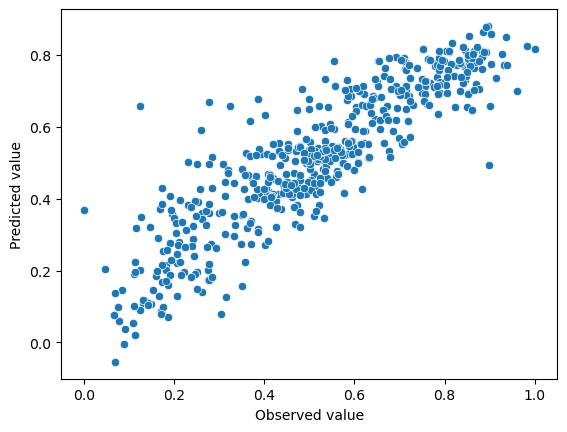

In [89]:
plot=sns.scatterplot(x=y_train, y=y_train_cnt)
plot.set_xlabel('Observed value')
plot.set_ylabel('Predicted value')

Here we can see that the relationship of Observed and Predicted Value is linear and asuumption linearity of the model is verified

## Assumption 2 : Error Terms is Normaly Distributed

Text(0.5, 1.0, 'Error Terms')

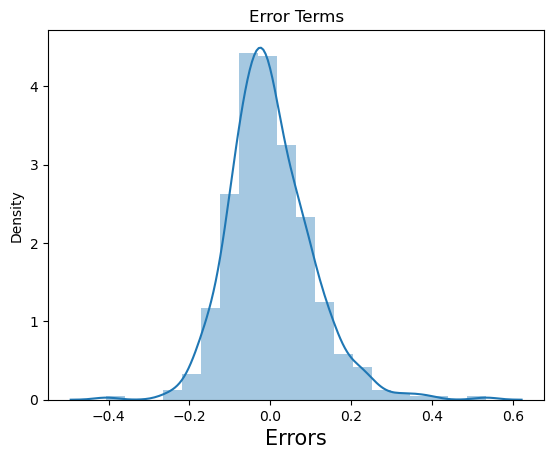

In [91]:
sns.distplot(y_train_cnt-y_train,bins=20)
plt.xlabel('Errors',fontsize=15)
plt.title('Error Terms')

## Assumption 3 : Mean of Error terms is Zero

In [92]:
residual = y_train_cnt-y_train
residual.mean() 

-3.030255784859251e-16

Here we can see that the mean value of error terms are almost zero

## Assumption 4 : Error terms have a constant variance

Text(0.5, 0, 'Index')

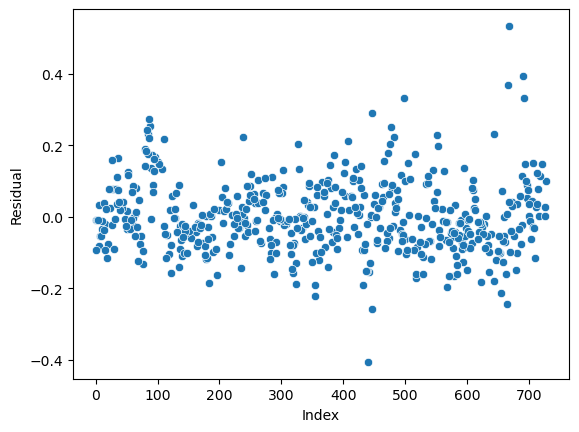

In [93]:
# Plotting the residual vs Observed value
plot=sns.scatterplot(x=X_train.index, y=y_train_cnt-y_train)
plot.set_ylabel('Residual')
plot.set_xlabel('Index')

Here we can see that error terms have almost constant variance
## Assumtion 5 :  No autocorrelation among the error terms - DW test 

In [94]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(y_train-y_train_cnt)
durbinWatson


1.9837714389847458

We can see value of DW test is almost 2 hence it is not autocorrelated

## Assumption 6 : No Multicollinearilty among the feature variables

<Axes: >

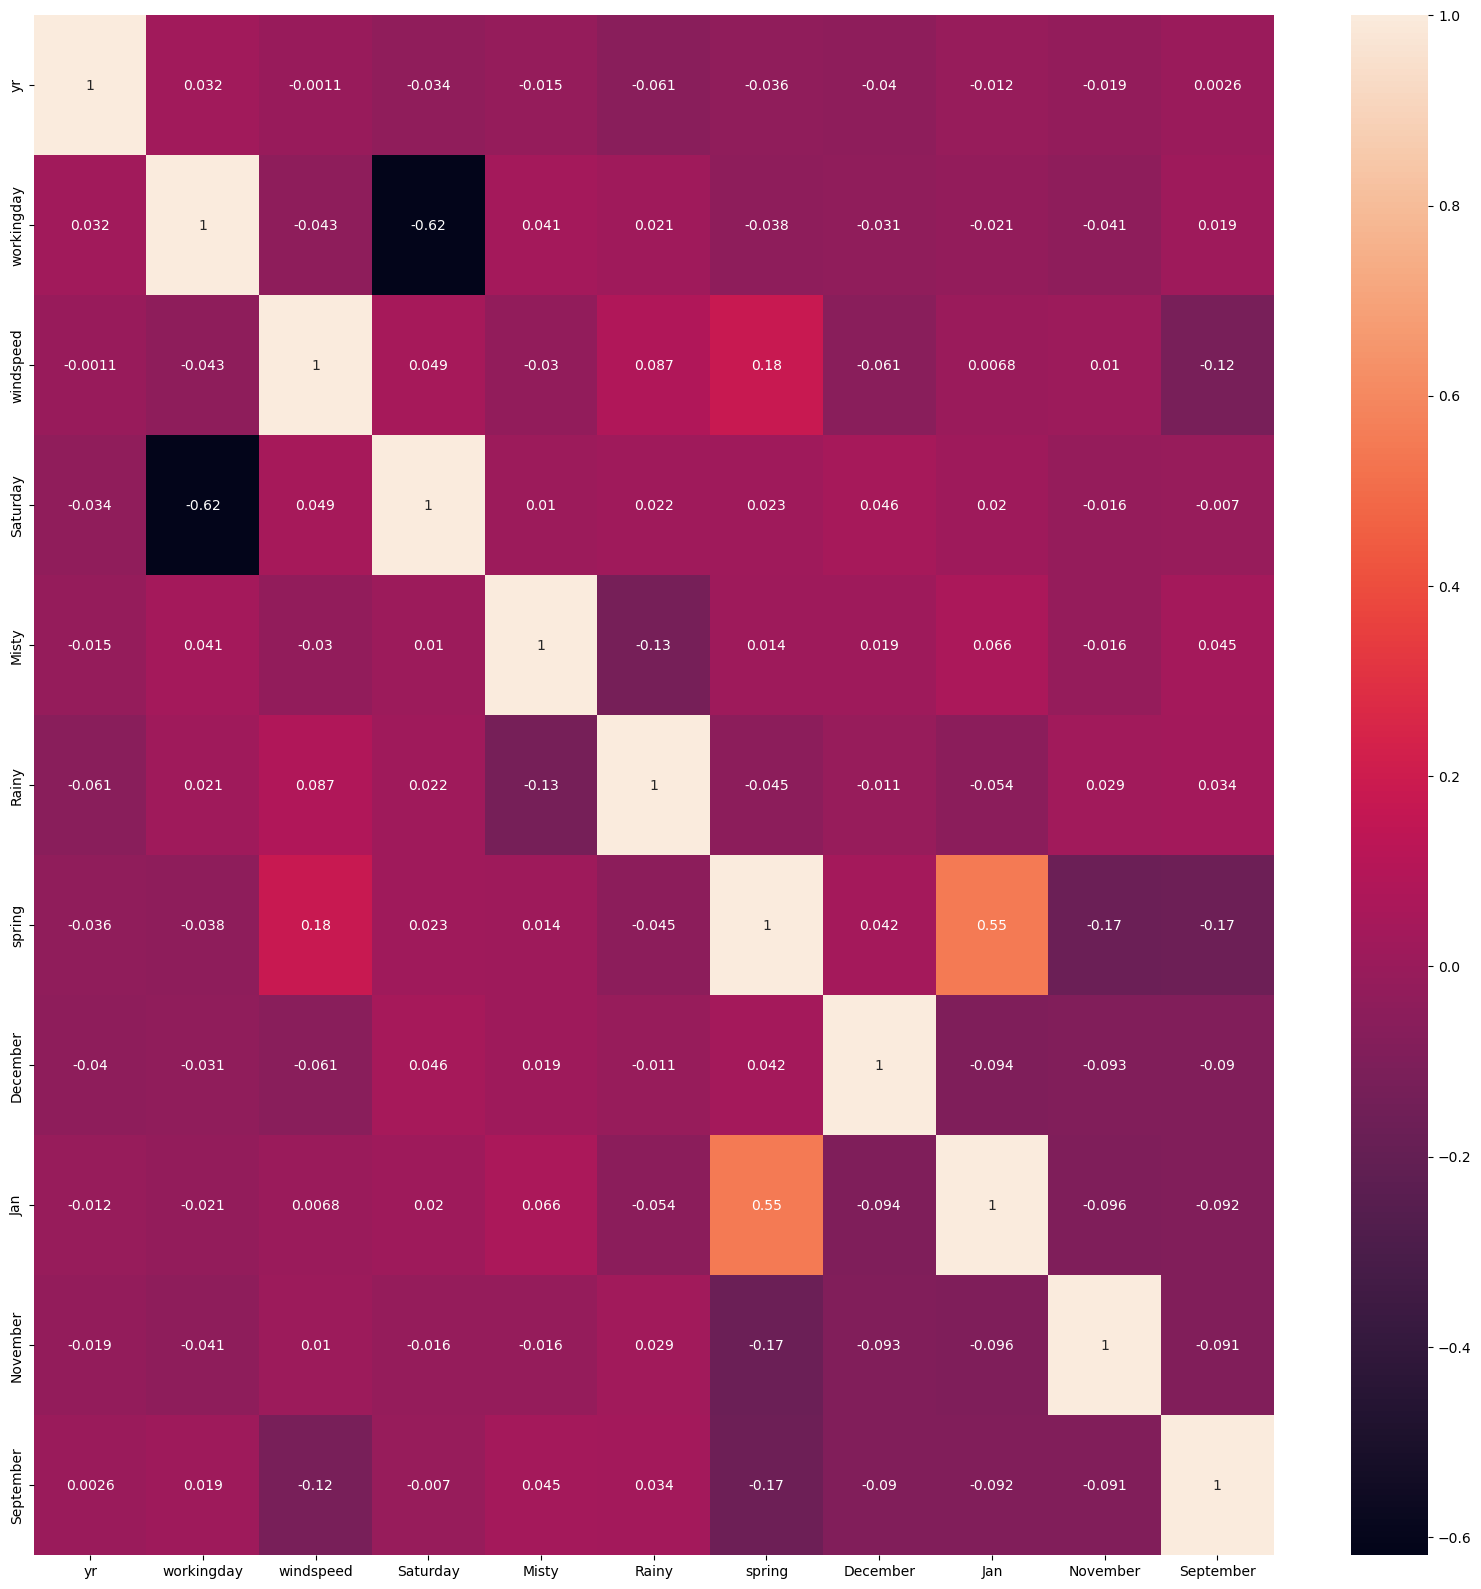

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_ref_sm.drop('const',axis=1).corr(),annot=True)

# Making Predictions



In [100]:
# Apply scaling on the test dataset

df_test[scaler_vars]= scaler.transform(df_test[scaler_vars])

In [101]:
# Generating y_test and X_test
y_test=df_test.pop('cnt')
X_test=df_test


In [102]:
X_test_final= sm.add_constant(X_test[X_train_ref.columns])

In [103]:
y_test_pred=lr_model.predict(X_test_final)

In [104]:
y_test_pred

184    0.413835
535    0.794088
299    0.418054
221    0.509008
152    0.467797
         ...   
400    0.397162
702    0.660965
127    0.508970
640    0.723183
72     0.316651
Length: 219, dtype: float64

# Model Evaluation

Text(0, 0.5, 'y predicted')

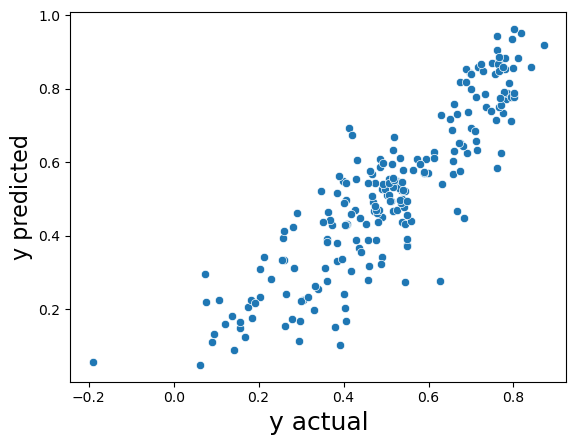

In [105]:
# Plot of y predicted vs y actual value
sns.scatterplot(x=y_test_pred,y=y_test)
plt.xlabel('y actual', fontsize=18)                          # X-label
plt.ylabel('y predicted', fontsize=16) 


    Equation Of best fitted line = 0.5234 + 0.2464*yr + 0.0563*workingday - 0.2083*windspeed + 0.0665*Saturday - 0.0921*Misty -0.3148 * Rainy - 0.2207 * spring - 0.1061*December -0.1219 *Jan - 0.0946 * November + 0.0730* September

In [107]:
r2 = r2_score(y_test, y_test_pred)

In [108]:
r2

0.7757592130422841

**Observation** : Train data had an r2 of 0.794 and of the test data is 0.775  which is very close . Hence we can consider this as a good model.

<Axes: ylabel='Density'>

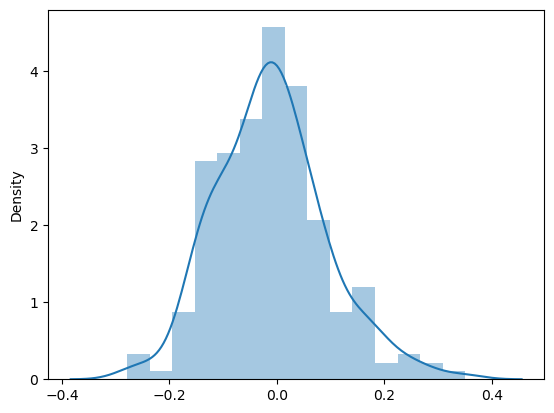

In [109]:
# Distribution of error terms
sns.distplot(y_test_pred-y_test)